In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

# Problem 2 - ADALINE

In [14]:
df = pd.read_csv('Iris.txt',header=None)
df.columns = ["SLen","SWidth","PLen","PWidth","Flower"]
df.replace("Iris-versicolor",int(1),inplace=True)
df.replace("Iris-virginica",int(-1),inplace=True)

In [15]:
data = df.to_numpy()
data = np.insert(data,4,np.ones(np.size(data,0)),axis=1)
data = data[50:150,:]

np.random.shuffle(data)
train = data
np.random.shuffle(data)
test = data

In [16]:
def adaline(x,w,beta,epochs=25):
    
    # create empty array to store errors
    Error = np.empty(epochs)
    
    # create empty array to store classification
    out = np.empty(np.size(x,0))
    
    for j in range(epochs):
        E = 0
        for i in range(np.size(x,0)):

            # classify
            z = np.dot(w.T,x[i,:5])
            # desired output
            T = int(x[i,5])

            # calculate error
            e = T - z

            # update weights
            w = w + beta*e*x[i,:5]
        
            E += np.sign(int(e))
        
        Error[j] = E
            
    return Error,w

In [17]:
weights = np.random.rand(np.size(train,1)-1)

error,wts = adaline(train,weights,0.001)

In [18]:
classif = np.empty(np.size(test,0))
for i in range(np.size(test,0)):
    classif[i] = int(np.sign(np.dot(wts.T,test[i,0:5])))

out = np.append(test,classif[:,None],1)

## 2.3 - Plot

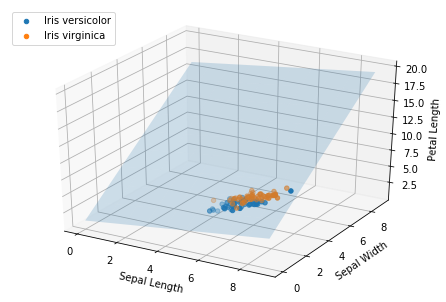

In [19]:
A = out[out[:,6]==1]
B = out[out[:,6]==-1]

xx,yy = np.meshgrid(range(0,10),range(0,10))
zz = (-wts[0]*xx - wts[1]*yy - wts[4])*1.0 / wts[2]

fig = plt.figure()
ax = Axes3D(fig)
for ii in [A,B]:
    lbl = np.unique(ii[:,6])
    if lbl == 1:
        lbl = "Iris versicolor"
    elif lbl == -1:
        lbl = "Iris virginica"
    ax.scatter(xs=np.asarray(ii[:,0],dtype="float"),ys=np.asarray(ii[:,1],dtype="float"),zs=np.asarray(ii[:,2],dtype="float"),label=lbl)

ax.plot_surface(xx,yy,zz,alpha=0.2)
plt.legend(loc=2)
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
plt.show()

## 2.4 - Residual Error

Text(0.5, 1.0, 'Adaline Residual Error')

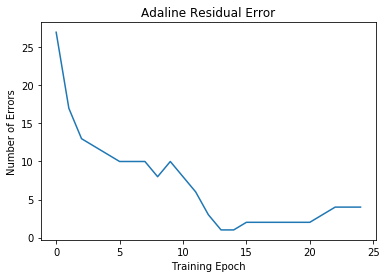

In [20]:
plt.figure()
plt.plot(abs(error))
plt.xlabel("Training Epoch")
plt.ylabel("Number of Errors")
plt.title("Adaline Residual Error")

## 2.5 - Learning Rate

Because ADALINE is a linear classifier, it won't converge for the nonlinearly separable data we are trying to classify. Either way, since ADALINE uses gradient descent, our learning rates should not be too big, as the algorithm will swing back and forth in large steps, and it won't find an optimal solution. For our purposes, a good learning rate should be stable at the end of our training epochs, so 0.0001 or 0.001 (the first two plots) would be the best learning rates.

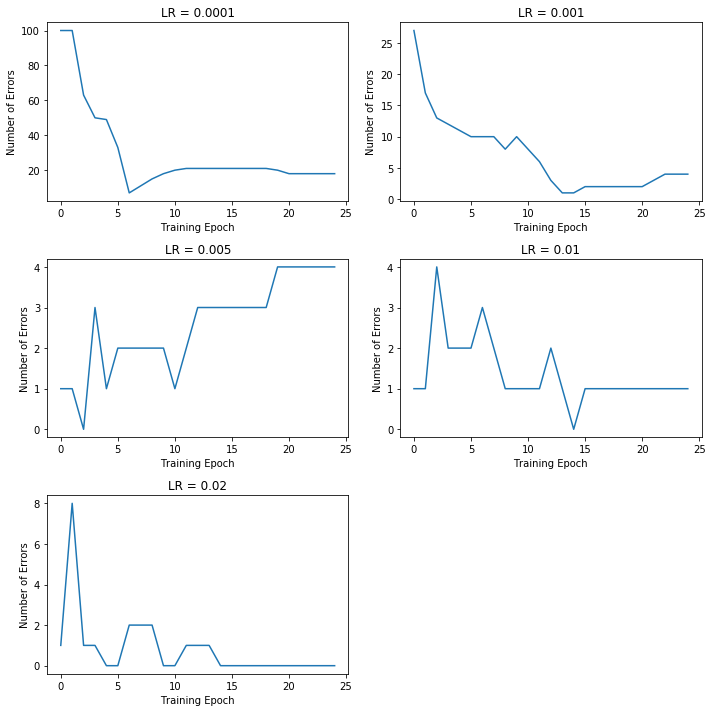

In [21]:
LR = [0.0001,0.001,0.005,0.01,0.02]

plt.figure(figsize=(10,10))
for i in range(len(LR)):
    ax = plt.subplot(3,2,i+1)
    error,wts = adaline(train,weights,LR[i])
    
    ax.plot(abs(error))
    plt.xlabel("Training Epoch")
    plt.ylabel("Number of Errors")
    plt.title("LR = "+str(LR[i]))

    plt.tight_layout()

While a faster learning rate decreases the error much faster, it makes the error rate more unstable as the algorithm is trained. Therefore, selecting an good learning rate is highly dependent on the amount of data one has: for smaller datasets and a higher tolerance for errors, it might be best to select a higher learning rate; otherwise, the algorithm will not converge during training. For our purposes, a learning rate of 0.001 seems to work best, since it reliably converges on a low error.